# 코드 실행전 준비사항 
###* content 파일 밑에 text, pdf 파일 만들기 
###* callrate.csv 파일 content 파일에 넣기 

In [3]:
## eKoNLP 설치용 

!pip install konlpy WordCloud # konlpy WordCloud 설치 
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git  # mecab 설치용
# 사용자 사전 추가용
#https://somjang.tistory.com/entry/Google-Colab%EC%97%90%EC%84%9C-mecab-ko-dic-%EC%82%AC%EC%9A%A9%EC%9E%90-%EC%82%AC%EC%A0%84-%EC%B6%94%EA%B0%80%ED%95%98%EA%B8%B0
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh

%cd /content/
# enonlp
! git clone https://github.com/entelecheia/eKoNLPy.git # 옆에 폴더에 설치 됩니다. 

! pip install /content/eKoNLPy

! pip install eKoNLPy --upgrade (for upgrade)


!pip install tika  # pdf-> txt 전환용


## 설치된것 실행용 혹시 나 tagger 에러 난다면!! 런타임을 재실행 해볼것  
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

## 설치 잘 되었는지 확인용 
from konlpy.tag import Mecab
mecab = Mecab()
sentence = " 라이브러리 설치 테스트 입니다."
temp_X = mecab.morphs(sentence)
temp_X



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-06-16 01:41:48--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=73wyWbzoi7cN2dL9KwpUBkP3bxY%3D&Expires=1655344693&AWSAcc

['라이브러리', '설치', '테스트', '입니다', '.']

## **크롤링**

In [4]:
# 금통위 의사록 크롤링 입니다. 
import os
import sys
import platform
import pandas as pd
import re
from datetime import datetime, timedelta

import requests
from bs4 import BeautifulSoup
#import html2text
from datetime import datetime



def get_minutes_list(from_date='20050101'): # 2005년 1월부터 pdf 파일 ㅔ공 
    prefix_addr = "https://www.bok.or.kr"
    from_date = datetime.strptime(from_date, '%Y%m%d')
    temp =0 # 몇번하는지 단순 순서 체크용입니다. 
    for pageIndex in range(1, 38): # 2005년 1월 1일 36 index 까지   
        url = 'https://www.bok.or.kr/portal/bbs/B0000245/list.do?menuNo=200761&pageIndex={}'.format(pageIndex)
        user_agent = 'Mozilla/5.0'
        headers = {'User-Agent': user_agent}
        page = requests.get(url, headers=headers)

        try: # 예외 처리용 혹시 접속 오류 등의 상황위한 체크 
            soup = BeautifulSoup(page.content, 'html.parser')
            brdList = soup.find_all('span', class_='col m10 s10 x9 ctBx')
            datainfo = soup.find_all('div', class_='col s12 dataInfo')
    
            for post, data in zip(brdList, datainfo):
                guid = prefix_addr + post.a['href'][:-12] 
                temp+=1
                dl_file(guid,temp)

        except:
            print("get url.content error and pass page{} it".format(pageIndex))


#다운로드용 
def dl_file(url,temp) :
    #print("url : ",url)
    user_agent = 'Mozilla/5.0'
    headers = {'User-Agent': user_agent}
    page = requests.get(url, headers=headers)

    soup = BeautifulSoup(page.content, 'html.parser')
    
    # 해당 파일이 pdf 인지 체크 합니다. 
    file_name = soup.find('div', class_='addfile').find('ul').findAll('li')[1].find('a').text # 접속후 태그 가지고 오기 
    file_name = file_name.strip()
    print(file_name)
    #file1 = soup.find('div', class_='addfile').find('ul').findAll('li')[1].find('a').attrs['href'] # 접속후 태그 가지고 오기 
    file1 = soup.find('div', class_='addfile').find('ul') # 접속후 태그 가지고 오기 
    if file_name in 'pdf':
      file1 = file1.findAll('li')[1].find('a').attrs['href']
    else :
      file1 = file1.findAll('li')[0].find('a').attrs['href']
    
    name = soup.find('h3', class_='subject').text # 이름 저장용입니다. 
    #subject

    link1 = 'http://www.bok.or.kr'+file1
    file_res = requests.get(link1)
    
    #pdf
    #print('여기서 에러 납니다.',"index : ",temp, " name : ",name," 파일 크롤링 ")
    with open('/content/pdf/{}.pdf'.format(name),'wb') as f : # pdf 폴더를 만들어야 합니다! 
      f.write(file_res.content)
      print("index : ",temp, " name : ",name," 파일 크롤링 ")


    
get_minutes_list(from_date='20050101')

print(" 파일 크롤링 py가 실행 완료 되었습니당! ~.~")




금융통화위원회 의사록(2022년도 제10차)(2022.5.26).pdf
index :  1  name :  금융통화위원회 의사록(2022년도 제10차)(2022.5.26)    파일 크롤링 
금융통화위원회 의사록(2022년도 제7차)(2022.4.14).pdf
index :  2  name :  금융통화위원회 의사록(2022년도 제7차)(2022.4.14)   파일 크롤링 
금융통화위원회 의사록(2022년도 제6차)(2022.3.24).pdf
index :  3  name :  금융통화위원회 의사록(2022년도 제6차)(2022.3.24)   파일 크롤링 
금융통화위원회 의사록(2022년도 제5차)(2022.3.10).pdf
index :  4  name :  금융통화위원회 의사록(2022년도 제5차)(2022.3.10.)   파일 크롤링 
금융통화위원회 의사록(2022년도 제4차)(2022.2.24).pdf
index :  5  name :  금융통화위원회 의사록(2022년도 제4차)(2022.2.24.)   파일 크롤링 
금융통화위원회 의사록(2022년도 제1차)(2022.1.14).pdf
index :  6  name :  금융통화위원회 의사록(2022년도 제1차)(2022.1.14.)   파일 크롤링 
금융통화위원회 의사록(2021년도 제25차)(2021.12.23).pdf
index :  7  name :  금융통화위원회 의사록(2021년도 제25차)(2021.12.23.)   파일 크롤링 
금융통화위원회 의사록(2021년도 제24차)(2021.12.9).pdf
index :  8  name :  금융통화위원회 의사록(2021년도 제24차)(2021.12.9.)   파일 크롤링 
금융통화위원회 의사록(2021년도 제23차)(2021.11.25).pdf
index :  9  name :  금융통화위원회 의사록(2021년도 제23차)(2021.11.25.)   파일 크롤링 
금융통화위원회 의사록(2021년도 제20차)(2021.10.12).pdf
inde

## PDF 인코딩 위한 TXT 파일 변환

In [16]:
from tika import parser

import os
from collections import defaultdict
from pandas import read_table
import numpy as np
import math
import datetime

print("텍스트 파일을 추출할 PDF파일명을 입력하세요.")
file_list = os.listdir('/content/pdf/') # 폴더 경로 수정

for file_1 in file_list:
  PDFfileName = file_1
  inputpath = PDFfileName
  if  'ipynb_checkpoints' in PDFfileName :
    continue

  parsed = parser.from_file('/content/pdf/'+PDFfileName)
#  print("  " ,parsed["content"])
  with open('/content/text/{}.txt'.format(PDFfileName[:-4]), 'w', encoding='utf-8') as f : # pdf 폴더를 만들어야 합니다! 
      f.write(parsed["content"])
      print("파일 불러오기 완료 ", PDFfileName)
      #print("index : ",temp, " name : ",name," 파일 크롤링 ")

 
  #print(parsed['content'], file=fileOut)
  

#출처: https://nearman.tistory.com/entry/8-파이썬으로-PDF파일-읽어오기-PDF파일에서-텍스트-내용-파싱 [옆집오빠:티스토리]

텍스트 파일을 추출할 PDF파일명을 입력하세요.
파일 불러오기 완료  금융통화위원회 의사록(2007년도 제21차)(2007.10.11) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2005년도 제21차)(2005.10.11) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2012년도 제21차)(2012.11.9) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2009년도 제3차)(2009.1.22) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2016년도 제21차)(2016.10.27.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2009년도 제24차)(2009.11.12) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2007년도 제15차)(2007.7.12) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2020년도 제4차)(2020.2.27.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2015년도 제6차)(2015.3.26.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2020년도 제17차)(2020.7.30.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2016년도 제25차)(2016.12.21.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2018년도 제25차)(2018.12.26.)  .pdf
파일 불러오기 완료  금융통화위원회 의사록(2005년도 제26차)(2005.12.8) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2021년도 제25차)(2021.12.23.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2006년도 제21차)(2006.10.12) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2013년도 제9차)(2013.5.9) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2016년도 제26차)(2016.12.29.) .pdf
파일 불러오기 완료  금융통화위원회 의사록(2009년도 제12차)(2009.5.12) .pdf
파일 불러오

##***generator Sentimenti***

In [ ]:
## generator Sentimenti
import os
from collections import defaultdict
from pandas import read_table
import numpy as np
import math
import datetime

from ekonlpy.sentiment import MPCK

mpck = MPCK()


class NaiveBayesClassifier:
    def __init__(self, k=0.5):
        self.k = k
        self.word_probs = []

    def load_corpusData(self, path):
        corpusData = read_table(path, sep=',', header=None, names=None, encoding='utf-8')
        corpusData = np.array(corpusData)

        return corpusData

    def count_words(self, training_set):
        counts = defaultdict(lambda: [0, 0])

        minutes_list = os.listdir('/content/text/') # 폴더 경로 수정

        file_list = minutes_list # 추가 크롤리이 된다면. 

        for dataDate, label in training_set:
            dataDate_without_dot = dataDate.replace('.', '')

            for file in file_list:

                if len(file) <20 : # 해당 pdf 파일 제외한 파일들 입력넘어가기 위한 용도
                  continue
                
                # 날짜처리
                str_datetime = file[24:][:-6].replace('.','-').replace('(','').replace(')','')
                
                if str_datetime[-1]=='-' :
                  str_datetime = str_datetime[:-1]

                format = '%Y-%m-%d' # 2022-1-1 로 string 저장 처리를 위한 함수 
                
                date_time_str = datetime.datetime.strptime(str_datetime, format)
                temp_str=date_time_str.isoformat()[:10]
                
                if dataDate == temp_str: # 해당 날짜처리후 날짜가 같은 것만 학습 ! 변동일 
                  
                  #latin_1
                  #.decode('utf-8')
                  corpus = open('text/'+file, 'r', encoding='utf-8').read()
                 
                  print("process minutes file name : ", file)

                  tokens = mpck.tokenize(corpus)
                  ngrams = mpck.ngramize(tokens)

                  for ngram in ngrams + tokens:
                      counts[ngram][0 if label == 1 else 1] += 1
            
        print(" 단어 갯수세기 부분 완료입니다. counts",counts)
        return counts

    def word_probabilities(self, counts, total_class0, total_class1, k):
        return [(w, (class0 + k) / (total_class0 + 2 * k), (class1 + k) / (total_class1 + 2 * k))
                for w, (class0, class1) in counts.items()]

    def train(self, trainfile_path):
        training_set = self.load_corpusData(trainfile_path)
#        print(training_set)
        positive = len([1 for _, label in training_set if label == 1])
        negative = len(training_set) - positive
        #print( poisi)
        word_counts = self.count_words(training_set)

        self.word_probs = self.word_probabilities(word_counts, positive, negative, self.k)

        # 기존 인코딩 utf-8 -> 수정인코딩 cp949 
        for noOfWord in range(len(self.word_probs)):
            if self.word_probs[noOfWord][1] / self.word_probs[noOfWord][2] > 1:
                with open('/content/positive.csv', 'a', encoding='cp949') as f:
                    f.write(self.word_probs[noOfWord][0] + '\n')
            else:
                with open('/content/negative.csv', 'a', encoding='cp949') as f:
                    f.write(self.word_probs[noOfWord][0] + '\n')


def str_to_date(file) :
  file[24:][:-7].replace('(','').replace(')','').replace('.','-')

model = NaiveBayesClassifier() # 클래스 호줄

model.train(trainfile_path='labeledCallRate.csv')


process minutes file name :  금융통화위원회 의사록(2005년도 제12차)(2005.6.9) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제13차)(2005.6.23) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제14차)(2005.7.7) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제17차)(2005.8.11) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제19차)(2005.9.8) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제20차)(2005.9.22) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제21차)(2005.10.11) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제24차)(2005.11.10) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제26차)(2005.12.8) .txt
process minutes file name :  금융통화위원회 의사록(2005년도 제27차)(2005.12.22) .txt
process minutes file name :  금융통화위원회 의사록(2006년도 제1차)(2006.1.5) .txt
process minutes file name :  금융통화위원회 의사록(2006년도 제2차)(2006.1.12) .txt
process minutes file name :  금융통화위원회 의사록(2006년도 제3차)(2006.1.26) .txt
process minutes file name :  금융통화위원회 의사록(2006년도 제4차)(2006.2.9) .txt
process minutes file name 

# ##** measureToneScore

In [ ]:
# measureToneScore
# -*- encoding: utf-8 -*-

import os
import pandas as pd
from collections import defaultdict
import csv
from ekonlpy.sentiment import MPCK

from ekonlpy.sentiment import KSA # 서울대에게 개발된 감정분석부분 

from ekonlpy.topic import MPTK

mptk = MPTK()

ksa = KSA()
mpck = MPCK() # 기존 사용 라이브 러리 

file_list = os.listdir('/content/text/')

# corpus = open('text/'+file, 'r', encoding='latin_1').read() 인코딩 참고 
positiveNgram = pd.read_csv('/content/positive.csv', sep='\n', header=None, names=['positiveNgram'], encoding='cp949')
negativeNgram = pd.read_csv('/content/negative.csv', sep='\n', header=None, names=['negativeNgram'], encoding='cp949')


for file in file_list:
    NoOfPositiveNgrams, NoOfnegativeNgrams = 0, 0

    minutes = open('/content/text/' + file, 'r', encoding='utf-8').read() # 인코딩 수정

    minutesTokens = mpck.tokenize(minutes)
    minutesNgrams = mpck.ngramize(minutesTokens)


    # 테스트용
    score_num = ksa.get_score(minutesTokens)
    print("서울대 score_num  : ",score_num)

    score_clas = mpck.classify(minutesTokens + minutesNgrams, intensity_cutoff=1.3)
    print("croe _class : ",score_clas)

    tokens = mptk.nouns(minutes)
    bow = mptk.doc2bow(tokens)
    dtm = mptk.get_document_topic(bow)


    print("tokens : ",tokens)
    print("dow : ",bow)
    print("dtm : ",dtm)


    ##########
    minutesNgramsTotal = minutesNgrams + minutesTokens

    print(file, '의 ngram 수: ', len(minutesNgramsTotal))
    print(file, '매칭 결과 : ')

    for mN in minutesNgramsTotal:
        for pN in positiveNgram.positiveNgram:
            if mN == pN:
                NoOfPositiveNgrams = NoOfPositiveNgrams + 1
                break
        #                 print('Positive match ngram: ')
        #                 print(mN, '==', pN)
        
        for nN in negativeNgram.negativeNgram:
            if mN == nN:
                NoOfnegativeNgrams = NoOfnegativeNgrams + 1
                break
         #            print('negative match ngram: ')
         #            print(mN, '==', nN)


    # 감성사전과 매칭되는 ngram이 없는 경우
    if (NoOfPositiveNgrams + NoOfnegativeNgrams) == 0:
        print('매칭되는 ngram 없음 ')
        continue

    print('NoOfPositiveNgrams : ', NoOfPositiveNgrams)
    print('NoOfnegativeNgrams : ', NoOfnegativeNgrams)

    polarityScore_sentence = (NoOfPositiveNgrams - NoOfnegativeNgrams) / (NoOfPositiveNgrams + NoOfnegativeNgrams)

    print('어조지수 : ', polarityScore_sentence)
    print()
    # csv 저장 순서 : 파일 명 , 어조지수, 전체 단어수, 긍정단어, 부정단어 
    with open('toneScore_newToneScoreGetcode_fromNewsBondDict.csv', 'a', encoding='cp949') as f:
        f.write(file + "," + str(polarityScore_sentence) +"," + str(len(minutesNgramsTotal)) + "," 
                + str(NoOfPositiveNgrams) +"," + str(NoOfnegativeNgrams) + '\n')


    # 날짜처리
    str_datetime = file[24:][:-6].replace('.','-').replace('(','').replace(')','')

    if str_datetime[-1]=='-' :
      str_datetime = str_datetime[:-1]

    format = '%Y-%m-%d' # 2022-1-1 로 string 저장 처리를 위한 함수 
    
    date_time_str = datetime.datetime.strptime(str_datetime, format)
    temp_str=date_time_str.isoformat()[:10]

    # 금리 산출용 데이터 추출 
    with open('tons_data.csv', 'a', encoding='cp949') as f:
        f.write(temp_str + "," + str(polarityScore_sentence) + '\n')


Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('의', 72), ('정', 48), ('제', 42), ('이', 40), ('원', 36)]
{'의': 72, '정': 48, '제': 42, '이': 40, '원': 36}


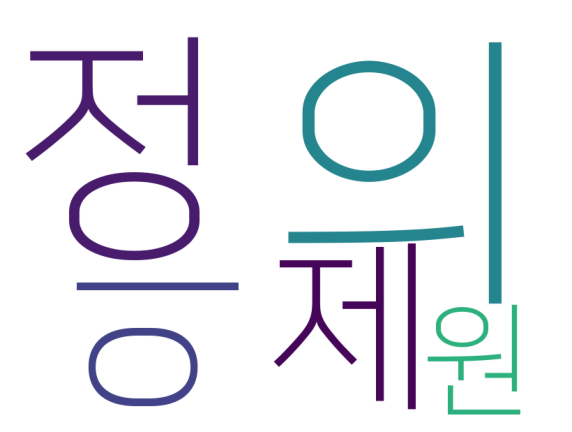

In [26]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

def make_wordcloud(word_count):
    twitter = Twitter()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    #
    file_list = os.listdir('/content/text/')
    for file in file_list :
      if '.ipynb_checkpoints' in file:
        continue 
      word_text = open('/content/text/' + file, 'r', encoding='utf-8').read()
      #print(len(word_text))
      for sentence in word_text:
          morph = twitter.pos(sentence)
          sentences_tag.append(morph)

          #print(morph)
          #print('-' * 30)
      break
  
    #print(sentences_tag)
    #print('\n' * 3)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective']: #, 
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)
 
    #wordCloud생성
    #한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path='NanumSquareL.ttf', background_color='white', width=800, height=600)
    print(dict(tags))
    #wc.generate_from_frequencies()
    cloud_1 = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud_1)
    plt.show()

 # 폴더 경로 수정
make_wordcloud(5)